In [47]:
import sys
import sklearn
import pandas


In [48]:
import matplotlib

In [49]:
import numpy as np 
from sklearn import preprocessing,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection 
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [51]:
#preprocessing the data
df.replace("?",-99999,inplace=True)
print(df.axes)
df.drop(labels=['id'],axis=1,inplace=True)
#print  the shape
print(df.shape)


[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [52]:
print(df)

     clump_thickness  uniform_cell_size  uniform_cell_shape  \
0                  5                  1                   1   
1                  5                  4                   4   
2                  3                  1                   1   
3                  6                  8                   8   
4                  4                  1                   1   
..               ...                ...                 ...   
694                3                  1                   1   
695                2                  1                   1   
696                5                 10                  10   
697                4                  8                   6   
698                4                  8                   8   

     marginal_adhesion  single_epithelial_size bare_nuclei  bland_chromatin  \
0                    1                       2           1                3   
1                    5                       7          10                3   
2     

In [53]:
##data visualization
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


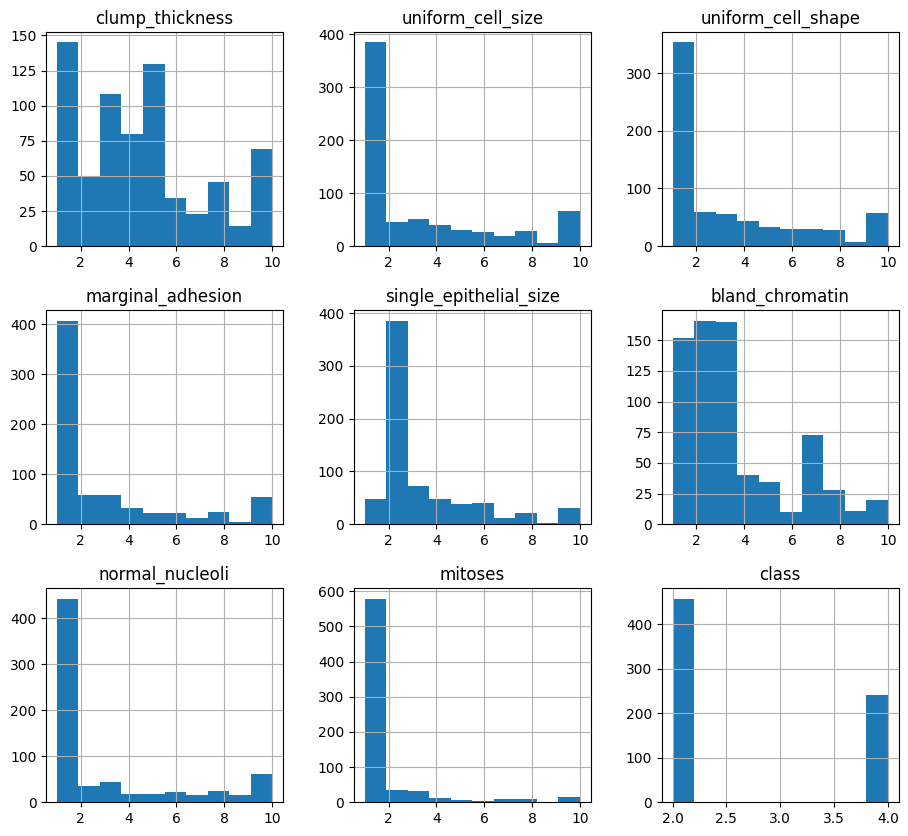

In [54]:
df.hist(figsize=(11,10))
plt.show()

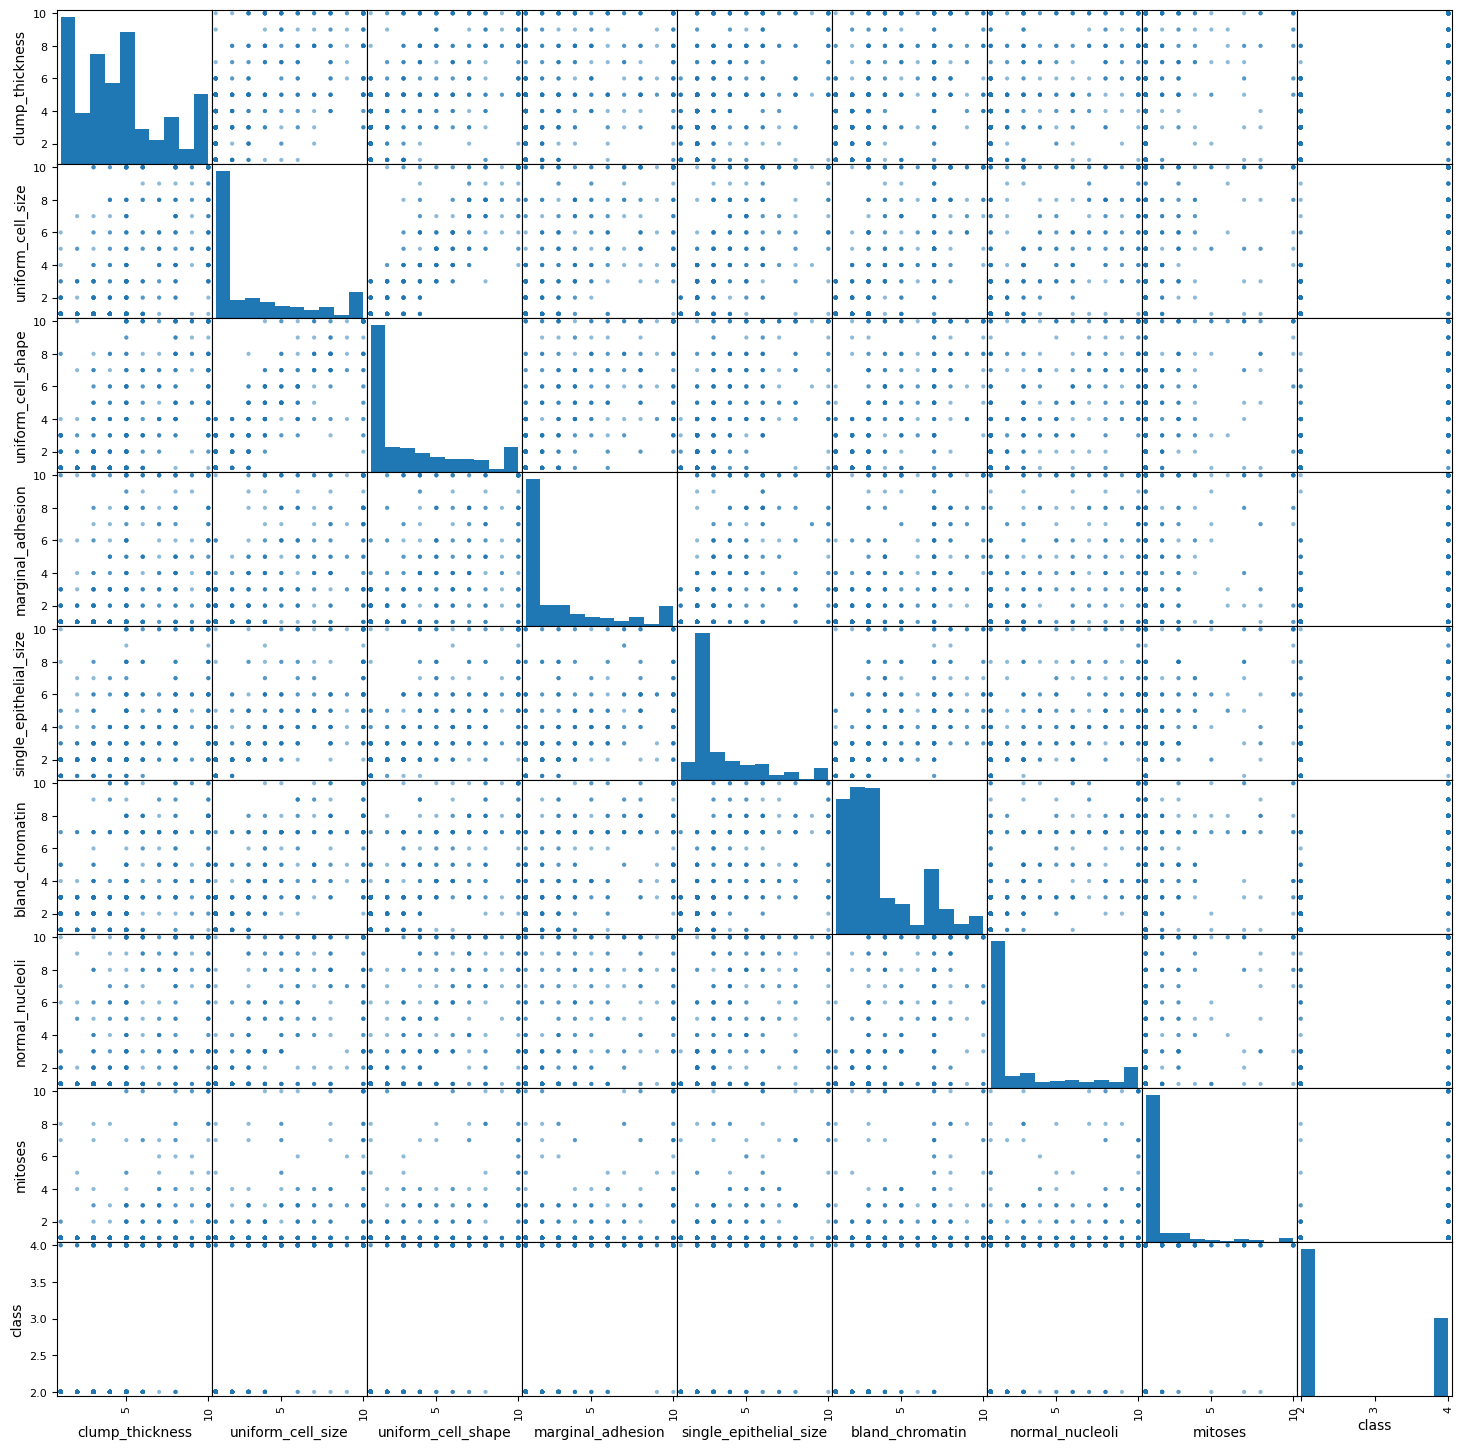

In [55]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [56]:
X=np.array(df.drop(labels=['class'],axis=1))
Y=np.array(df['class'])
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [57]:
print(df.columns)


Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')


In [58]:
X=np.array(df.drop(labels=['class'],axis=1))
np.array(df['class'])
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [59]:
seed=8
scoring="accuracy"

In [60]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.969578 (0.016094)
SVM: 0.658247 (0.053715)


In [61]:
for name,model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test,predictions))
    print(classification_report(Y_test,predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        90
           4       0.96      0.98      0.97        50

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.6428571428571429
              precision    recall  f1-score   support

           2       0.64      1.00      0.78        90
           4       0.00      0.00      0.00        50

    accuracy                           0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.41      0.64      0.50       140



C:\Users\Aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train = [[1, 2], [2, 3], [3, 4], [4, 5]]  # Example features
Y_train = [0, 1, 0, 1]  # Example labels (0: no cancer, 1: cancer)

X_test = [[1.5, 2.5], [3.5, 4.5]]  # Example test features
Y_test = [0, 1]  # Actual labels for the test data

# Initialize and train the SVM classifier with linear kernel
clf = SVC(kernel="linear")
clf.fit(X_train, Y_train)

# Predict on test set
Y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy))

# Print predictions
for i, pred in enumerate(Y_pred):
    if pred == 1:
        print(f"Sample {i+1}: Predicted to have cancer")
    else:
        print(f"Sample {i+1}: Predicted to not have cancer")


Accuracy on test set: 1.00
Sample 1: Predicted to not have cancer
Sample 2: Predicted to have cancer
